# Nancy Stock Portfolio

https://en.wikipedia.org/wiki/Nancy_Pelosi
https://www.yahoo.com/video/nancy-pelosi-stock-portfolio-10-130214531.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['AB', 'MU','TSLA','NVDA','AXP', 'PYPL', 'DIS', 'AAPL', 'GOOGL', 'MSFT']
start = '2020-01-01'
end = '2022-07-20'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  10 of 10 completed


,AAPL,AB,AXP,DIS,GOOGL,MSFT,MU,NVDA,PYPL,TSLA
Date,,,,,,,,,,
2020-01-02,73.785912,24.142345,121.533417,148.199997,68.433998,156.924408,55.070541,59.803608,110.750000,86.052002
2020-01-03,73.068558,24.118387,120.326302,146.500000,68.075996,154.970367,54.215504,58.846394,108.760002,88.601997
2020-01-06,73.650795,24.246168,119.804817,145.649994,69.890503,155.370972,53.261040,59.093178,110.169998,90.307999
2020-01-07,73.304413,24.917011,119.177109,145.699997,69.755501,153.954346,57.933933,59.808594,109.669998,93.811996
2020-01-08,74.483597,25.364241,121.234055,145.399994,70.251999,156.406586,57.188251,59.920765,111.820000,98.428001


In [3]:
df.tail()

,AAPL,AB,AXP,DIS,GOOGL,MSFT,MU,NVDA,PYPL,TSLA
Date,,,,,,,,,,
2022-07-13,145.490005,40.779999,139.399994,92.940002,111.353500,252.720001,58.860001,151.639999,71.360001,711.119995
2022-07-14,148.470001,40.430000,136.479996,91.839996,110.367500,254.080002,59.349998,153.720001,69.550003,714.940002
2022-07-15,150.169998,41.029999,142.479996,95.199997,111.777496,256.720001,61.529999,157.619995,73.910004,720.200012
2022-07-18,147.070007,39.910000,142.330002,95.699997,109.029999,254.250000,60.450001,161.009995,74.129997,721.640015
2022-07-19,151.000000,41.110001,147.779999,99.610001,113.809998,259.529999,62.400002,169.919998,77.739998,736.590027


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
2 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

2 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
AAPL: 10000.0
AB: 10000.0
AXP: 10000.0
DIS: 10000.0
GOOGL: 10000.0
MSFT: 10000.0
MU: 10000.0
NVDA: 10000.0
PYPL: 10000.0
TSLA: 10000.0


In [8]:
print('Number of Shares:')
percent_invest = [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
AAPL: 135
AB: 414
AXP: 82
DIS: 67
GOOGL: 146
MSFT: 63
MU: 181
NVDA: 167
PYPL: 90
TSLA: 116


In [9]:
print('Beginning Value:')
percent_invest = [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
AAPL: $9961.1
AB: $9994.93
AXP: $9965.74
DIS: $9929.4
GOOGL: $9991.36
MSFT: $9886.24
MU: $9967.77
NVDA: $9987.2
PYPL: $9967.5
TSLA: $9982.03


In [10]:
print('Current Value:')
percent_invest = [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
AAPL: $20385.0
AB: $17019.54
AXP: $12117.96
DIS: $6673.87
GOOGL: $16616.26
MSFT: $16350.39
MU: $11294.4
NVDA: $28376.64
PYPL: $6996.6
TSLA: $85444.44


In [11]:
result = []
percent_invest = [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $221275.1


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: AAPL: 104.65%
Holding Period Return: AB: 70.28%
Holding Period Return: AXP: 21.6%
Holding Period Return: DIS: -32.79%
Holding Period Return: GOOGL: 66.31%
Holding Period Return: MSFT: 65.39%
Holding Period Return: MU: 13.309999999999999%
Holding Period Return: NVDA: 184.13%
Holding Period Return: PYPL: -29.81%
Holding Period Return: TSLA: 755.98%


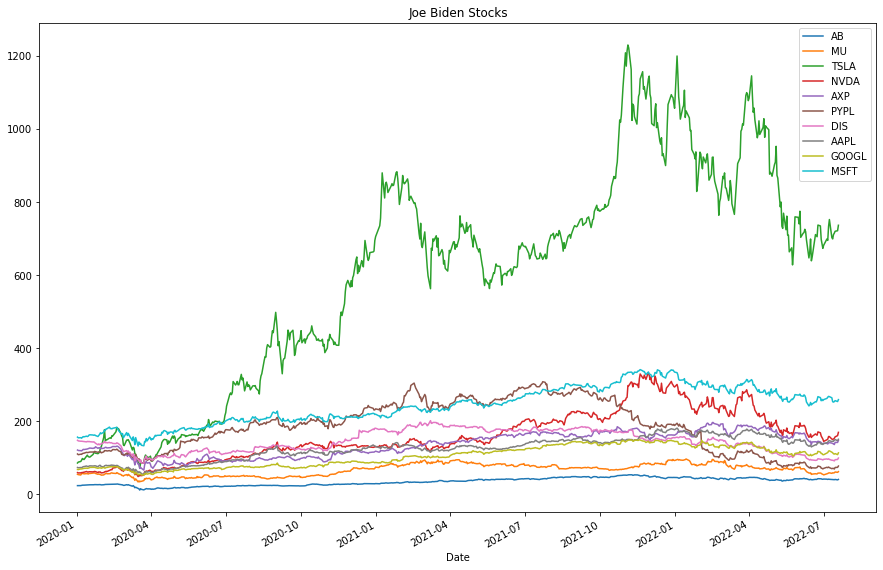

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Joe Biden Stocks')
plt.legend()

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

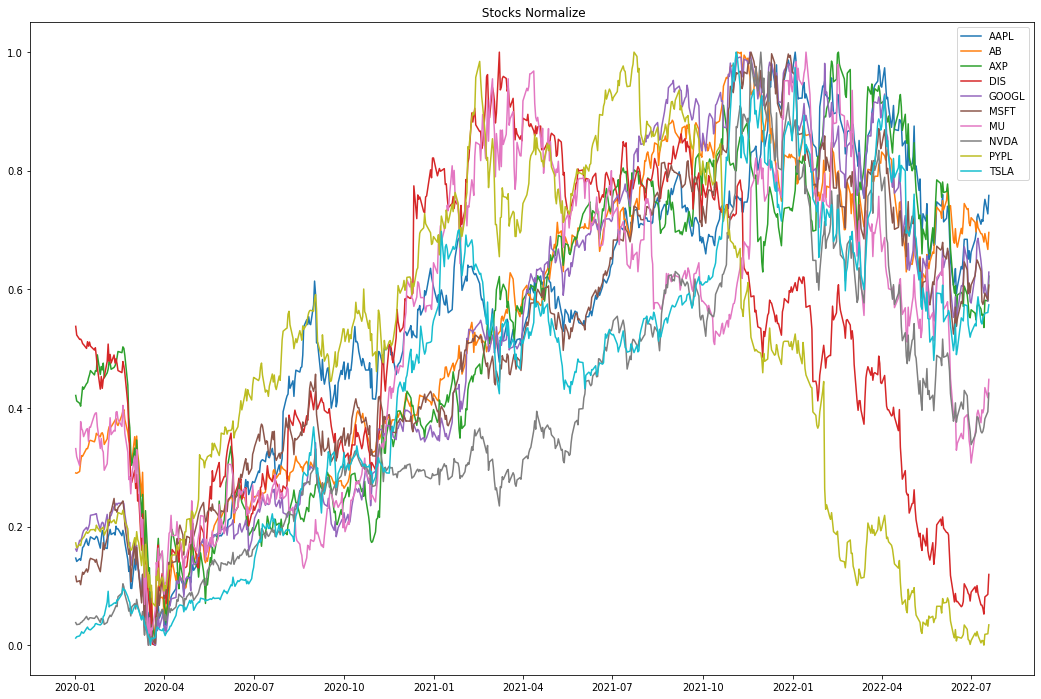

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [16]:
df.min()

AAPL      55.250999
AB        11.992376
AXP       66.594704
DIS       85.760002
GOOGL     52.706501
MSFT     132.665573
MU        34.271198
NVDA      48.986927
PYPL      69.550003
TSLA      72.244003
dtype: float64

In [17]:
for s in symbols:
    print(s + ":",  df[s].max())

AB: 53.83076477050781
MU: 97.03714752197266
TSLA: 1229.9100341796875
NVDA: 333.5917663574219
AXP: 197.0809326171875
PYPL: 308.5299987792969
DIS: 201.91000366210938
AAPL: 181.51170349121094
GOOGL: 149.8385009765625
MSFT: 341.60638427734375


In [18]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,AB Return,MU Return,TSLA Return,NVDA Return,AXP Return,PYPL Return,DIS Return,AAPL Return,GOOGL Return,MSFT Return
Date,,,,,,,,,,
2020-01-03,-0.000992,-0.015526,0.029633,-0.016006,-0.009932,-0.017968,-0.011471,-0.009722,-0.005231,-0.012452
2020-01-06,0.005298,-0.017605,0.019255,0.004194,-0.004334,0.012964,-0.005802,0.007968,0.026654,0.002585
2020-01-07,0.027668,0.087736,0.038801,0.012107,-0.005239,-0.004538,0.000343,-0.004703,-0.001932,-0.009118
2020-01-08,0.017949,-0.012871,0.049205,0.001876,0.017260,0.019604,-0.002059,0.016086,0.007118,0.015928


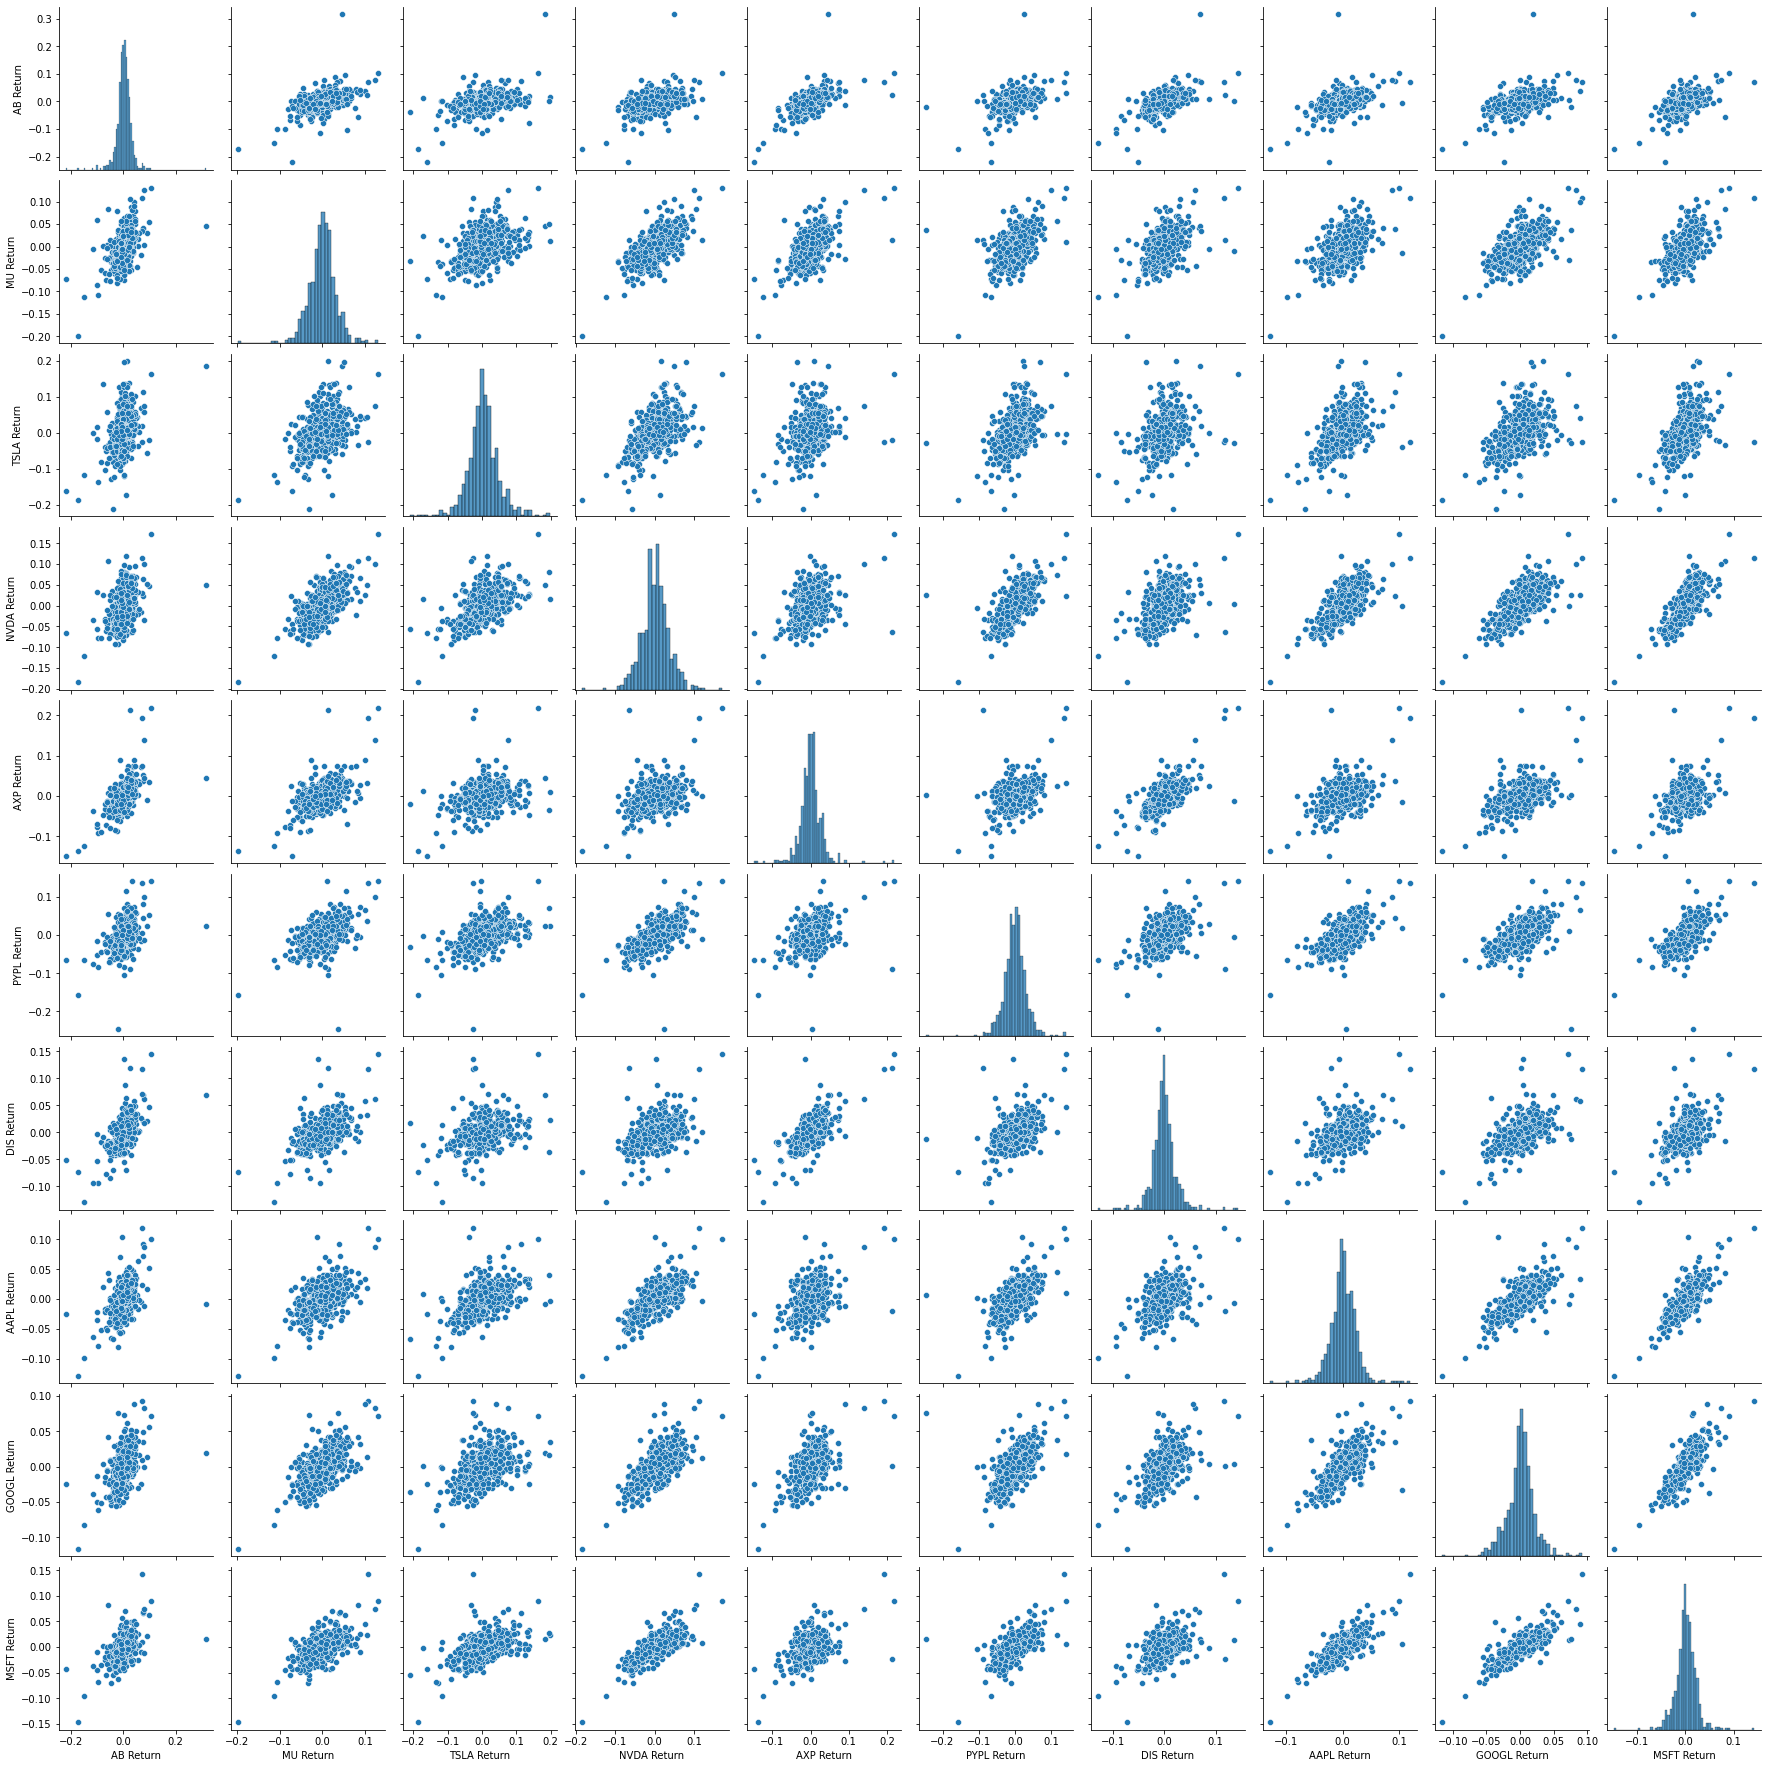

In [19]:
sns.pairplot(returns[1:])

<AxesSubplot:>

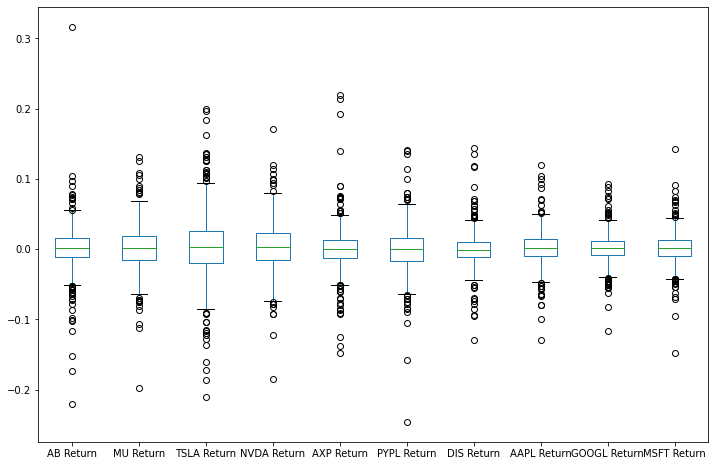

In [20]:
returns.plot(kind='box',figsize=(12,8))

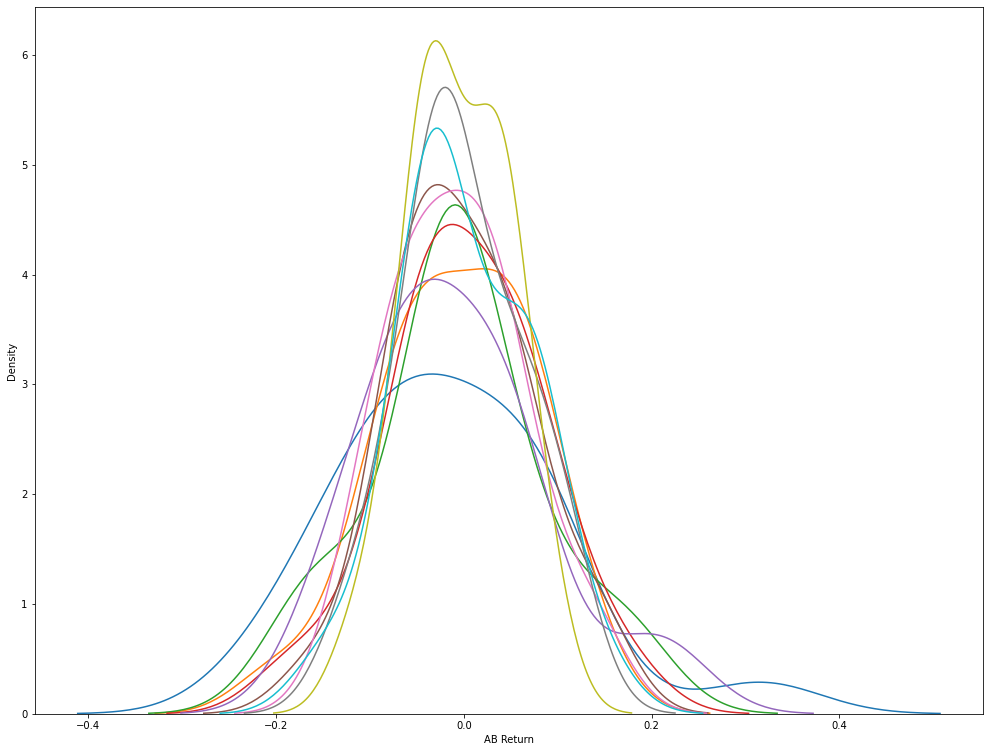

In [21]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.loc["2020-03-01" : "2020-03-31 "][r])

In [22]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

AB Return      2020-03-19
MU Return      2020-03-24
TSLA Return    2020-02-03
NVDA Return    2020-03-24
AXP Return     2020-03-24
PYPL Return    2020-03-24
DIS Return     2020-03-24
AAPL Return    2020-03-13
GOOGL Return   2020-03-13
MSFT Return    2020-03-13
dtype: datetime64[ns]


In [23]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

AB Return      2020-03-18
MU Return      2020-03-16
TSLA Return    2020-09-08
NVDA Return    2020-03-16
AXP Return     2020-03-18
PYPL Return    2022-02-02
DIS Return     2020-03-12
AAPL Return    2020-03-16
GOOGL Return   2020-03-16
MSFT Return    2020-03-16
dtype: datetime64[ns]


In [24]:
returns.corr()

,AB Return,MU Return,TSLA Return,NVDA Return,AXP Return,PYPL Return,DIS Return,AAPL Return,GOOGL Return,MSFT Return
AB Return,1.000000,0.507211,0.415833,0.439507,0.621700,0.434208,0.581124,0.463568,0.490117,0.508904
MU Return,0.507211,1.000000,0.435578,0.667664,0.573230,0.510370,0.525085,0.564842,0.609985,0.609692
TSLA Return,0.415833,0.435578,1.000000,0.548779,0.302865,0.459794,0.340133,0.518518,0.459151,0.513142
NVDA Return,0.439507,0.667664,0.548779,1.000000,0.410054,0.661488,0.454896,0.710547,0.712110,0.762882
AXP Return,0.621700,0.573230,0.302865,0.410054,1.000000,0.407230,0.705752,0.467105,0.525393,0.488898
PYPL Return,0.434208,0.510370,0.459794,0.661488,0.407230,1.000000,0.490001,0.628259,0.591502,0.654153
DIS Return,0.581124,0.525085,0.340133,0.454896,0.705752,0.490001,1.000000,0.484427,0.552828,0.528962
AAPL Return,0.463568,0.564842,0.518518,0.710547,0.467105,0.628259,0.484427,1.000000,0.718941,0.808530
GOOGL Return,0.490117,0.609985,0.459151,0.712110,0.525393,0.591502,0.552828,0.718941,1.000000,0.813270
MSFT Return,0.508904,0.609692,0.513142,0.762882,0.488898,0.654153,0.528962,0.808530,0.813270,1.000000


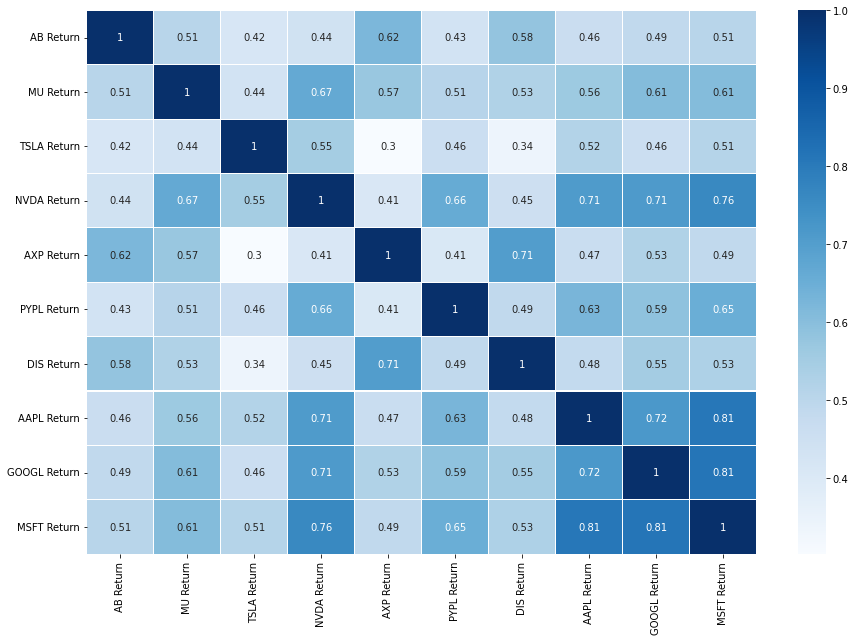

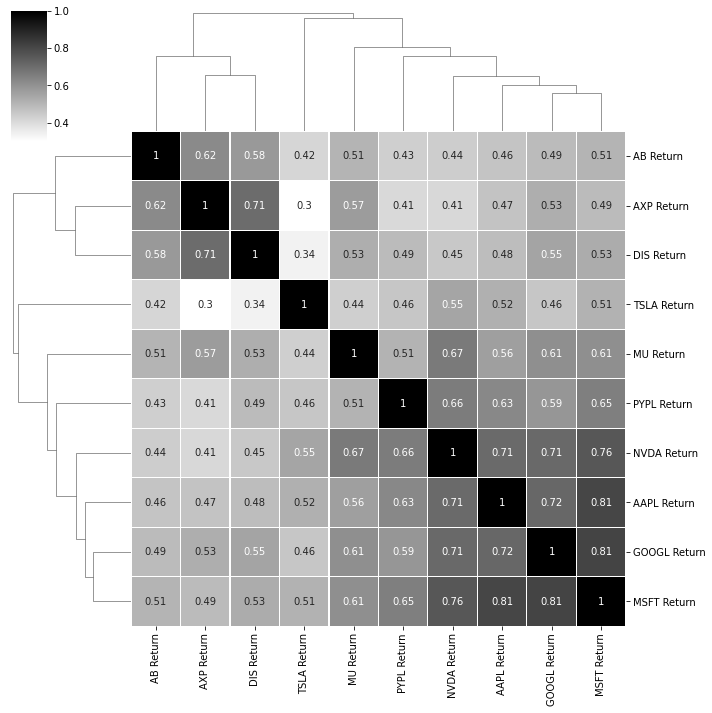

In [25]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

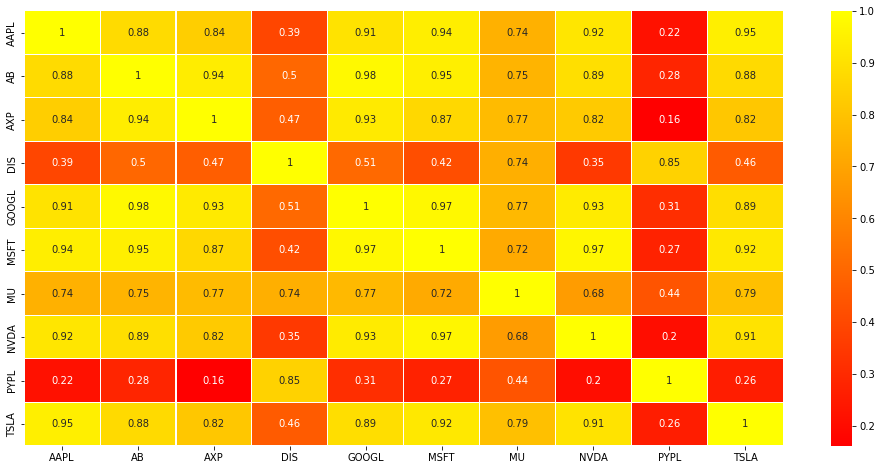

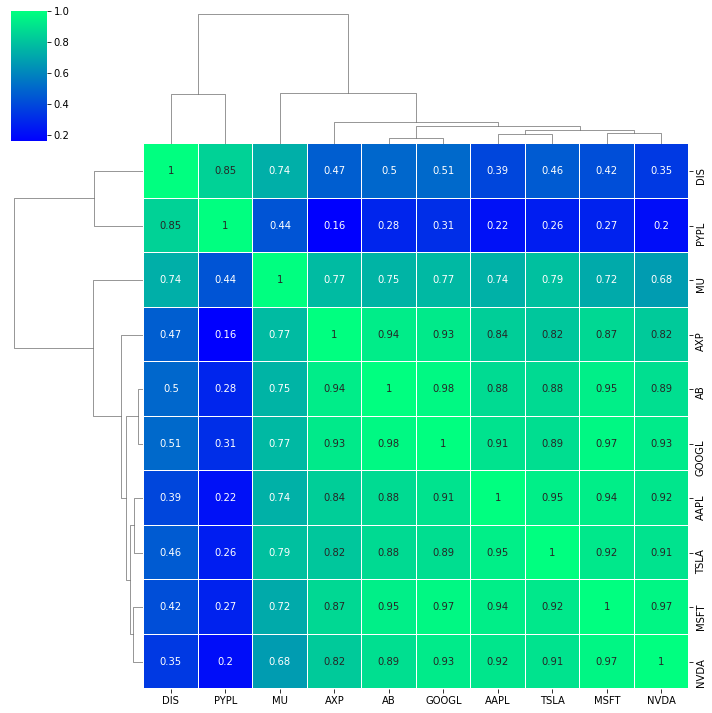

In [26]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

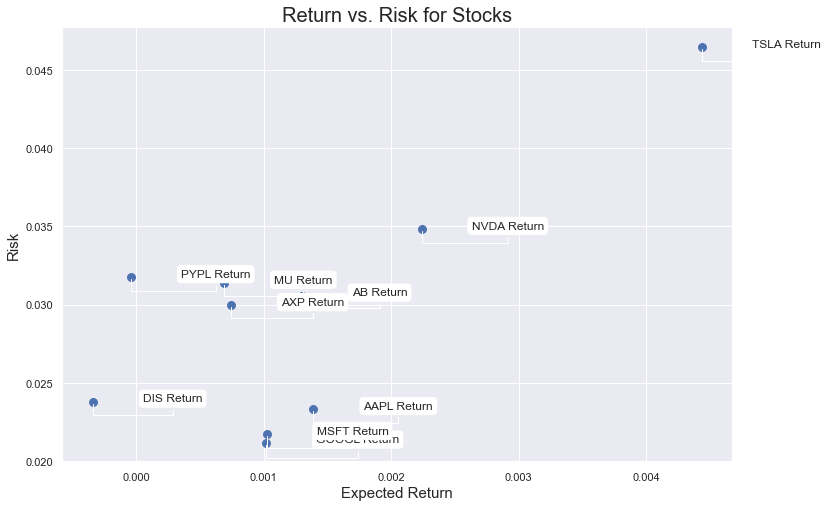

In [27]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [28]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [29]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [30]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.02846674 -0.03784817 -0.03761862 -0.03080709 -0.02609924 -0.0267991
                     -0.03950908 -0.0423678  -0.04069702 -0.05504447]
95%                 [-0.03693103 -0.04894583 -0.04849437 -0.03944412 -0.03378694 -0.03468618
                     -0.0509051  -0.05501324 -0.05222242 -0.07190656]
99%                 [-0.05280861 -0.0697632  -0.06889545 -0.05564576 -0.04820779 -0.04948104
                     -0.07228215 -0.07873398 -0.07384216 -0.10353704]


In [31]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
AAPL: -0.0285
AB: -0.0378
AXP: -0.0376
DIS: -0.0308
GOOGL: -0.0261
MSFT: -0.0268
MU: -0.0395
NVDA: -0.0424
PYPL: -0.0407
TSLA: -0.055


In [32]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
AAPL: $2850.0
AB: $3780.0
AXP: $3760.0
DIS: $3080.0
GOOGL: $2610.0
MSFT: $2680.0
MU: $3950.0
NVDA: $4240.0
PYPL: $4070.0
TSLA: $5500.0


In [33]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
AAPL: $5280.0
AB: $6980.0
AXP: $6890.0
DIS: $5560.0
GOOGL: $4820.0
MSFT: $4950.0
MU: $7230.0
NVDA: $7870.000000000001
PYPL: $7380.0
TSLA: $10350.0
